In [1]:
from magma import *
import os
os.environ["MANTLE"] = "coreir"
from mantle import And, Or, XOr

class FullAdder(Circuit):
    name = "FullAdder"
    IO = ["a", In(Bit), "b", In(Bit), "cin", In(Bit), "out", Out(Bit), "cout", Out(Bit)]
    @classmethod
    def definition(io):
        # Generate the sum
        _sum = XOr(3)(io.a, io.b, io.cin)
        wire(_sum, io.out)
        # Generate the carry
        carry = Or(3)(And(2)(io.a, io.b), And(2)(io.b, io.cin), And(2)(io.a, io.cin))
        wire(carry, io.cout)

In [2]:
# from magma.backend.verilog import compile as compile_verilog

# print(compile_verilog(FullAdder))
from magma.backend.coreir_ import compile as compile_coreir

print(compile_coreir(FullAdder, "build/FullAdder.json"))

None


In [3]:
from magma.simulator.python_simulator import testvectors

test_vectors = [
    [0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 0, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1],
    [1, 1, 1, 1, 1]
]

tests = testvectors(FullAdder)
print(tests)
print( "Success" if tests == test_vectors else "Failure" )

[[0, 0, 0, 0, 0], [0, 0, 1, 1, 0], [0, 1, 0, 1, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [1, 0, 1, 0, 1], [1, 1, 0, 0, 1], [1, 1, 1, 1, 1]]
Success


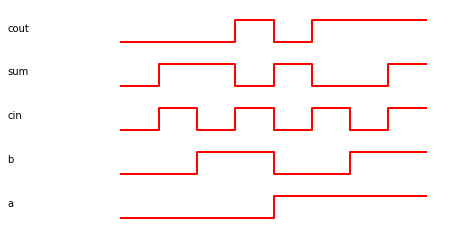

In [4]:
from magma.waveform import waveform

waveform(tests, ["a", "b", "cin", "sum", "cout"])